# Project 02 - Image Processing

## Student Information

- Full name: Lý Anh Quân
- Student ID: 22127344
- Class: 22CLC05

## Required Libraries

In [39]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Function algorithm Definitions

In [40]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    raw_img = Image.open(img_path)
    img = np.array(raw_img)

    return img

def save_img(result_img, img_path, func):
    '''
    Save the result image with a specific function name in the image path.

    Parameters
    ----------
    result_img : Image
        result image after processing
    img_path : str
        Path of image
    func : str
        Function name
    '''



    # YOUR CODE HERE
    output_file = img_path.split('.')[0] + '_' + func + '.' + img_path.split('.')[1]
    result_img.save(output_file)

def show_img(img_path, src_img, result_img, func):
    """Show result image and save it

    Args:
        
        img_path (str): 
            image path
        src_img (Image): 
            source image
        result_img (Image): 
            result image
        func (str): 
            name of function on image
    """
    # show image before and after processing

    fig, ax = plt.subplots(1, 2)
    ax[0].set_title("Origin image")
    ax[0].imshow(src_img)
    ax[1].set_title(f"{func}_image")
    ax[1].imshow(result_img)
    
    # Save image
    save_img(result_img, img_path, func)

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE

def testcases(choice, img_path):
    '''
    Test cases for image processing

    Parameters
    ----------
    choices : list
        List of choices
    img_path : str
        Path of image
    '''
    src_img = read_img(img_path)
    if choice == 0 or choice == 1:
        bright_img = test_brightness(src_img)
        show_img(img_path, src_img, bright_img, "brightness")
    if choice == 0 or choice == 2:
        contrast_img = test_contrast(src_img)
        show_img(img_path, src_img, contrast_img, "contrast")
    if choice == 0 or choice == 3:
        mode = int(input("Press 1: Horizontal\n Press 2: Vertical\n"))
        if mode == 1:
            flip_img = test_flip(src_img, "horizontal")
            show_img(img_path, src_img, flip_img, "horizontal")
        elif mode == 2:
            flip_img = test_flip(src_img, "vertical")
            show_img(img_path, src_img, flip_img, "vertical")
        else: 
            print("Invalid mode")
    if choice == 0 or choice == 4:
        gray_img = test_grayscale(src_img)
        show_img(img_path, src_img, gray_img, "grayscale")
        sepia_img = test_sepia(src_img)
        show_img(img_path, src_img, sepia_img, "sepia")
    if choice == 0 or choice == 5:
        blur_img = test_blur(src_img)
        show_img(img_path, src_img, blur_img, "blur")
        sharp_img = test_sharp(src_img)
        show_img(img_path, src_img, sharp_img, "sharp")
    if choice == 0 or choice == 6:
        crop_center_img = test_crop_center(src_img)
        show_img(img_path, src_img, crop_center_img, "crop_center")
    if choice == 0 or choice == 7:
        src2_img = read_img(img_path)
        circle_img = test_circle_mask(src2_img)
        show_img(img_path, src_img, circle_img, "circle_mask")
        src3_img = read_img(img_path)
        ellipse_img = test_ellipse_mask(src3_img)
        show_img(img_path, src_img, ellipse_img, "ellipse_mask")
    if choice == 8:
        print("Invalid choice")


def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    # YOUR CODE HERE
    height, width, channel = img_2d.shape
    img_1d = img_2d.reshape(height * width, channel)

    return img_1d

def adjust_brightness(img, brightness = 50):
    '''
    Adjust brightness of image

    Parameters
    ----------
    img : np.ndarray with shape=(height * width, num_channels)
        Image
    alpha : float
        Alpha value

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    new_img = img + np.array([brightness], dtype=np.int16) 
    new_img = np.clip(new_img, 0, 255)
    return new_img.astype(np.uint8) #Cast new float arr into unsigned int arr


def adjust_contrast(img, contrast = 1.28):
    '''
    Adjust contrast of image

    Parameters
    ----------  
    img : np.ndarray with shape=(height * width, num_channels)
        Image
    contrast : float
        Contrast value

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    new_img = img * np.array([contrast], dtype=float)
    new_img = np.clip(new_img, 0, 255)
    return new_img.astype(np.uint8) #Cast new float arr into unsigned int arr

def flip_image(img, direction):
    '''
    Flip image

    Parameters
    ----------
    img : np.ndarray with shape=(height * width, num_channels)
        Image
    axis : str
        Axis to flip

    Returns
    -------
        Image
    '''

    if direction == 'vertical':
        return np.flipud(img)
    elif direction == 'horizontal':
        return np.fliplr(img)
    else:
        return img

#https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#void%20cvtColor%28InputArray%20src,%20OutputArray%20dst,%20int%20code,%20int%20dstCn%29
def grayscale(img):
    '''
    Convert image to grayscale

    Parameters
    ----------
    img : np.ndarray with shape=(height * width, num_channels)
        Image

    Returns
    -------
    res : np.ndarray with shape=(height, width, num_channels)
        Grayscale image with 3 channels (R, G, B)
    '''

    weight = np.array([0.299, 0.587, 0.114])
    grayscale_img = np.dot(img[...,:3],weight)
    #đảm bảo rằng ảnh đầu ra vẫn giữ nguyên định dạng 3D với 3 kênh đều là giá trị grayscale
    res = np.dstack((grayscale_img,grayscale_img,grayscale_img))
    return res


def sepia(img):
    '''
    Convert image to sepia

    Parameters
    ----------
    img : np.ndarray with shape=(height * width, num_channels)
        Image
    
    Returns
    -------
    sepia_img : np.ndarray with shape=(height, width, num_channels)
        Sepia image with 3 channels (R, G, B)
    '''
    weight = np.array([[0.393, 0.35, 0.272],
                      [0.769, 0.686, 0.534],
                      [0.189, 0.168, 0.13]])
    sepia_array = np.clip(np.matmul(img, weight), a_min=0, a_max=255)
    sepia_img = Image.fromarray(np.uint8(sepia_array))
    return sepia_img


def apply_filter(img, type):
    """ 
    Apply blur/sharp filter  to image    

    Args:
        img:
            Image
        type : str
            If type is "blur", apply blur filter to image, else apply sharp filter to image

    Returns:
        blurred_img:
            Image after apply filter
    """
    # Get kernel (blur or sharp)
    BOX_KERNEL = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]).astype(np.float32) * 1/9
    GAUSSIAN_KERNEL = np.array([[1,4,6,4,1], [4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]).astype(np.float32)/256
    SHARPEN_KERNEL = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    if type == "blur":
        kernel = GAUSSIAN_KERNEL
    elif type == "sharp":
        kernel = SHARPEN_KERNEL
    img = img.astype(np.float32)

     # height, width of image and kernel
    img_height, img_width = img.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]
    # padding
    padding = kernel_height // 2
    # New matrix to store result
    result = np.zeros((img_height, img_width, 3))
    # Create new matrix with padding
    b = np.zeros((img_height+2*padding, img_width+2*padding, 3))
    # Copy image to new matrix
    b[padding:padding+img_height, padding:padding+img_width,:] = img
    # Apply filter
    for i in range(img_height) :
        for j in range(img_width):
            if type == "blur":
                result[i,j,:] = np.sum(b[i:i+kernel_height, j:j+kernel_width, :] * kernel[:,:,np.newaxis], axis=(0,1))
            else:
                result[i,j,:] = np.clip(np.sum(b[i:i+kernel_height, j:j+kernel_width, :] * kernel[:,:,np.newaxis], axis=(0,1)), a_min=0, a_max=255)
    blurred_img = Image.fromarray(np.uint8(result))        
    return blurred_img

def crop_center(img):
    '''
    Crop center of image

    Parameters
    ----------
    img : np.ndarray with shape=(height * width, num_channels)
        Image
    Returns
    -------
    cropped_img : 
        Cropped image
    '''

    # YOUR CODE HERE
    
    size = img.shape[0]
    # vị trí sẽ được giữ lại
    remain = (size // 4) - 1

    crop_arr = img[remain:(3*size//4)-1, remain:(3*size//4)-1]
    # Chuyển ma trận kết quả thành ảnh
    crop_img = Image.fromarray(np.uint8(crop_arr))
    return crop_img

def circle_mask(img, size_img):
    '''
    Create circle mask

    Parameters
    ----------
    img : np.ndarray with shape=(height * width, num_channels)
        Image
    img_size : int
        Size of image

    Returns
    -------
    mask : np.ndarray with shape=(height, width, num_channels)
        Circle mask
    '''

    # YOUR CODE HERE
    black = np.array([0, 0, 0])
    r = size_img // 2
    x0, y0 = size_img // 2, size_img // 2
    y, x = np.ogrid[:size_img, :size_img]
    # Công thức tổng quát của hình tròn: (x - x0)^2 + (y - y0)^2 = r^2
    mask = np.sqrt((x - x0)**2 + (y - y0)**2) <= r
    img[~mask] = black
    img = Image.fromarray(np.uint8(img))
    return img


def ellipse_mask(img, size_img):
    '''
    Create ellipse mask

    Parameters
    ----------
    img : np.ndarray with shape=(height * width, num_channels)
        Image
    img_size : int
        Size of image

    Returns
    -------
    mask : np.ndarray with shape=(height, width, num_channels)
        Ellipse mask
    '''

    # YOUR CODE HERE
    black = np.array([0, 0, 0])
    d = size_img
    y, x = np.ogrid[:size_img, :size_img]
    a = d*(10**0.5)/5
    b = a/2
    
    
    numerator_1 = ((x - d/2)/(2**0.5) + (y - d/2)/(2**0.5))**2
    numerator_2 = ((x - d/2)/(2**0.5) - (y - d/2)/(2**0.5))**2
    #Công thức tổng quát của hình elip: (x - x0)^2/a^2 + (y - y0)^2/b^2 = 1
    elip1 = numerator_1/(a**2) + numerator_2/(b**2)

    elip2 = numerator_2/(a**2) + numerator_1/(b**2)
    
    mask = (elip1 <= 1) | (elip2 <= 1)
    img[~mask] = black
    img = Image.fromarray(np.uint8(img))
    return img


<ins>Note:</ins> For clarity, include docstrings with each function.

## Test functions

In [41]:
def test_brightness(img):
		'''
		Test adjust_brightness function

		Parameters
		----------
		img : <your type>
				Image
		'''
		result = adjust_brightness(img)
		result = Image.fromarray(np.uint8(result))
		return result


def test_contrast(img):
		'''
		Test adjust_contrast function

		Paremeters
		----------
		img : <your type>
				Image
		'''
		result = adjust_contrast(img)
		result = Image.fromarray(np.uint8(result))
		return result
	
def test_flip(img, direction):
		'''
		Test flip_image function
		
		Parameters
		----------
		img : <your type>
				Image
		'''
		result = flip_image(img, direction)
		result = Image.fromarray(np.uint8(result))
		return result
		
def test_grayscale(img):
		'''
		Test grayscale function
		
		Parameters
		----------
		img : <your type>
				Image
		'''
		img_1d = convert_img_to_1d(img)
		result = grayscale(img)
		result = result.astype("uint8")
		result = result.reshape(img.shape)
		result = Image.fromarray(result)
		return result	

def test_sepia(img):
		'''
		Test sepia function

		Parameters
		----------
		img : <your type>
				Image
		'''
		result = sepia(img)
		return result
			
def test_sharp(img):
		'''
		Test apply_filter function

		Parameters
		----------
		img : <your type>
				Image
		'''
		result = apply_filter(img, type = "sharp")
		return result
	
def test_blur(img):
		'''
		Test apply_filter function

		Parameters
		----------
		img : <your type>
				Image
		'''
		result = apply_filter(img, type = "blur")
		return result

def test_crop_center(img):
		'''
		Test crop_center function

		Parameters
		----------
		img : <your type>
				Image
		'''
		result = crop_center(img)
		return result

def test_circle_mask(img):
		'''
		Test circle_mask function

		Parameters
		----------
		img : <your type>
				Image
		'''
		img_size = img.shape[0]
		result = circle_mask(img, img_size)
		return result

def test_ellipse_mask(img):
		'''
		Test ellipse_mask function

		Parameters
		----------
		img : <your type>
				Image
		'''
		img_size = img.shape[0]
		result = ellipse_mask(img, img_size)
		# plt.imshow(result)
		return result

## Your tests

## Main FUNCTION

In [42]:
def main():
	img_path = input("Please enter the name of your image file: ")
	print("0. All function. \n1. Adjust brightness. \n2. Adjust contrast \n3. Flip image (vertical or horizontal) \n4. Convert to grayscale/sepia \n5. Sharpen/blur images \n6. Crop at center \n7. Circular/ellipse mask \n8. Exit\n ")
	choice = int(input("Enter your choice: "))
	testcases(choice, img_path)
	

0. All function. 
1. Adjust brightness. 
2. Adjust contrast 
3. Flip image (vertical or horizontal) 
4. Convert to grayscale/sepia 
5. Sharpen/blur images 
6. Crop at center 
7. Circular/ellipse mask 
8. Exit
 


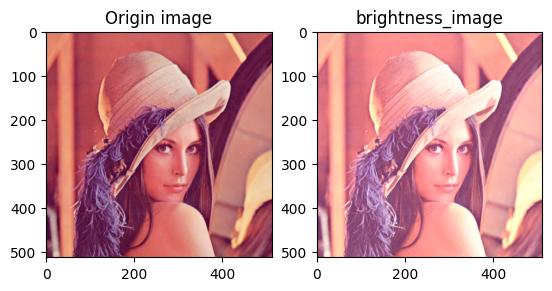

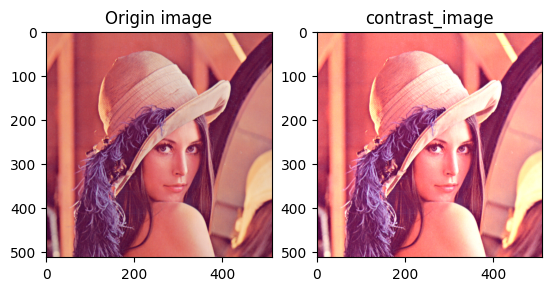

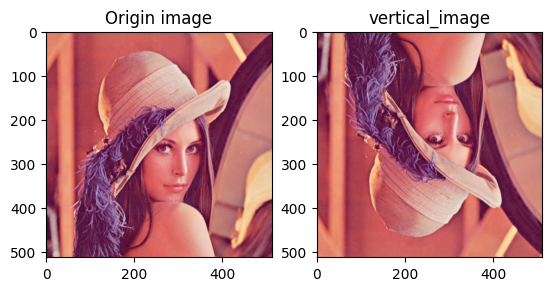

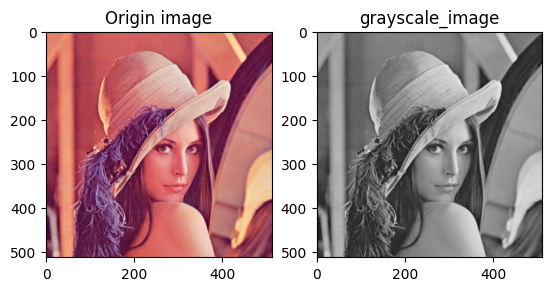

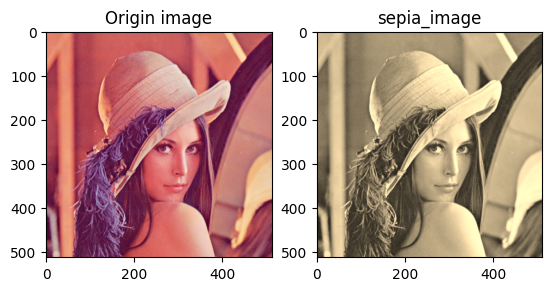

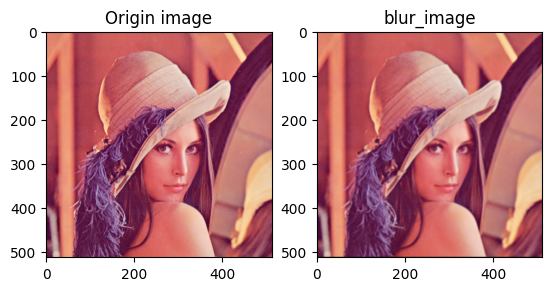

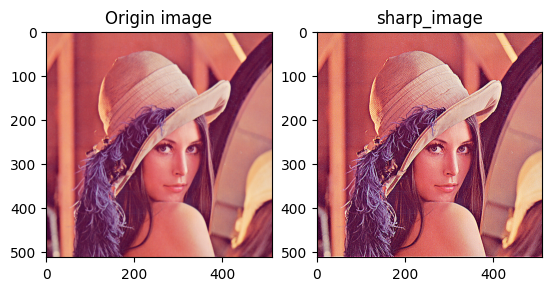

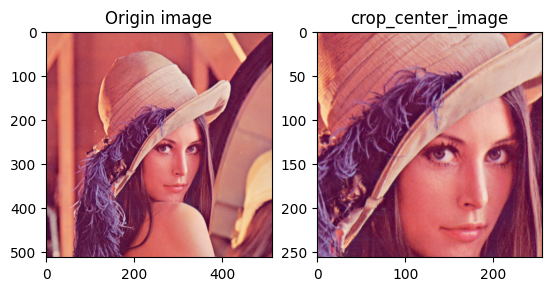

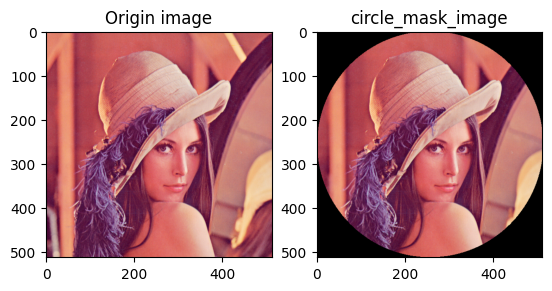

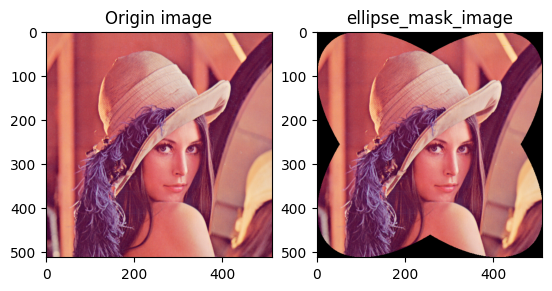

In [43]:
# Call main function
main()